# Simple Linear Regression

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.axes as axes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
# Load iris data set and show the first five rows of the data
df = pd.read_csv('data_for_lr (1).csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [19]:
# Stastical describion of the data
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [20]:
df = df.dropna()


In [21]:
# separate the data into tran and test datas
x_train = np.array(df.x[0:500]).reshape(500,1)
y_train = np.array(df.y[0:500]).reshape(500,1)

x_test = np.array(df.x[500:700]).reshape(199,1)
y_test = np.array(df.y[500:700]).reshape(199,1)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class LinearRegression:
    def __init__(self):
        self.parameters = {}
        self.loss = []

    def forward_propagation(self, x_train):
        m = self.parameters['m']
        c = self.parameters['c']
        prediction = np.multiply(m, x_train) + c
        return prediction

    def cost_function(self, prediction, y_train):
        cost = np.mean((prediction - y_train) ** 2)
        return cost

    def backward_propagation(self, x_train, y_train, prediction):
        derivatives = {}
        df = prediction - y_train
        dm = np.mean(np.multiply(df, x_train))
        dc = np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] -= learning_rate * derivatives['dm']
        self.parameters['c'] -= learning_rate * derivatives['dc']

    def train(self, x_train, y_train, learning_rate, iters):
        # initialize parameters randomly
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(x_train), max(x_train), 100)

        # initial regression line
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'],
                        color='red', label='Regression Line')
        ax.scatter(x_train, y_train, marker='o', color='green', label='Training Data')
        ax.set_ylim(0, max(y_train) + 1)

        def update(frame):
            prediction = self.forward_propagation(x_train)
            cost = self.cost_function(prediction, y_train)
            derivatives = self.backward_propagation(x_train, y_train, prediction)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print(f"Iteration = {frame + 1}, Loss = {cost}")
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # optional: save animation (requires ffmpeg)
        # ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Iteration = 1, Loss = 97.28417898960399
Iteration = 1, Loss = 16.23303078391623


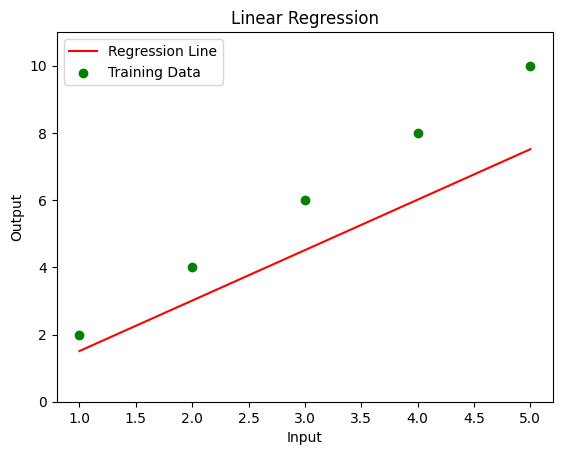

Final Parameters: {'m': 1.501690538574609, 'c': 0.006868135481873816}


In [35]:
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([2, 4, 6, 8, 10])

linear_reg = LinearRegression()
parameters, loss = linear_reg.train(x_train, y_train, learning_rate=0.05, iters=20)
print("Final Parameters:", parameters)
